IA & Data science (LU3IN0226) -- 2020-2021
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Edoardo Sarti, Olivier Schwander.*


## Projet 2021

### Préparation du notebook


<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

BADRIOUICHE Mohamed - 3701404
<br/>KRISNI Almehdi - 3800519

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2021</tt> et rajouter à la suite de <tt>projet-2021</tt> les noms des membres du binômes séparés par un tiret.

Par exemple, pour le binôme Luke Skywalker et Han Solo, le nom de fichier devient `projet2021-Skywalker-Solo`

Penser à sauvegarder fréquemment le fichier en cours de travail :
- soit en cliquant sur l'icône "disquette"
- soit par la combinaison de touches [Ctrl]-S

## Données

Les données vous sont fournies sur le moodle. 
Ces données sont fournies sur Kaggle, ce sont les données *Google Play Store Apps* accessibles à l'adresse https://www.kaggle.com/lava18/google-play-store-apps.

Il est indispensable de lire en détail la page Kaggle pour comprendre à quoi ces données correspondent.

Le compte-rendu a fournir le jour de la dernière séance de TDTME de votre groupe doit comporter:
- un fichier PDF qui correspond à un poster sur lequel sont expliqués les différents problèmes traités, la façon dont ils ont été traités, et les résultats obtenus.
- un notebook par problème traité, vous pouvez traiter autant de problème que vous le souhaitez. Le problème étudié doit être décrit précisément et vous devez impérativement suivre le format ci-dessous.

Bien entendu, le tout sera mis dans un fichier archive (tar.gz ou zip exclusivement) et déposé sur le site Moodle.


## Partie 1 - Description du problème

Aujourd'hui, un consommateur peut donner son avis sur presque tout, et cela peut avoir un impact important vis-à-vis de l'entreprise. 
Une pensée populaire est de croire que les consommateurs ont tendance à laisser plus de commentaires négatifs que positifs sur internet. C'est ce qu'on va essayer de prouver, au travers de la classification

## Partie 2 - Modèle

Afin de répondre à cette problématique, nous allons utiliser les différents classifiers vu durant les premiers TME de Sciences des Données (KNN, Perceptron, Adaline).

Pour ce faire, nous allons initialement définir les exemples selon leur Rating (+/- 4.3/5, défini afin de bien répartir les données), avant de classer selon leur sentiment moyen global et le nombre de commentaires. 

Dans un premier temps, nous allons faire un nouveau dataFrame contenant à la fois le nombre de commentaires par application et leurs sentiments moyen associés.
Ensuite nous ferons disparaître toutes les lignes qui ne nous interésse pas : 
- S'il n'y a pas de commentaire pour une application donnée
- Si le nombre de review est supérieur à 100 000, afin de limiter notre modèle 

Nous aurons donc au final, un ensemble d'application qu'on supposera "bien" et un autre qu'on supposera "mauvais", qu'on classera selon le nombre de commentaire et sentiment moyen. 

On considèrera le code des classifiers dans la partie 5 du notebook, d'après fichier iads/classifiers.py

## Partie 3 - Code



In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import random

# importation de Classifiers
from iads import Classifiers

# importation de utils
from iads import utils


#### 1. Nettoyage du dataset

In [2]:
#On importe les dataFrame
df = pd.read_csv('data\googleplaystore.csv')
df_user = pd.read_csv('data\googleplaystore_user_reviews.csv')

# Pour commencer on se débarasse des NaN présent
df = df.dropna()
df_user = df_user.dropna()

# Mise au bon format de la colonne reviews
df['Reviews'] = df['Reviews'].apply(lambda x:int(x))

# Mise au bon format de la colonne Sentiment
df_user.loc[:,'Sentiment'] = df_user.loc[:,'Sentiment'].apply(lambda x : 1 if (x == 'Positive') else -1)

# Pour finir on se débarasse encore des NaN présent
df = df.dropna()
df_user = df_user.dropna()

df.head(5)
df_user.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,1,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,1,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,1,0.40,0.875000
4,10 Best Foods for You,Best idea us,1,1.00,0.300000
5,10 Best Foods for You,Best way,1,1.00,0.300000


#### 2. Création d'un nouveau dataFrame résultat de la fusion des deux précédents

In [24]:

# On crée un Dictionnaire
dico = dict()

dico["App"] = list(df['App'].values)
dico["Rating"] = list(df['Rating'].values)
dico["Reviews"] = list(df["Reviews"].values)
dico["Sentiment_pol_moyen"] = []
dico["Sentiment_sub_moyen"] = []
dico["Sentiment_moyen"] = []
dico["Commentary"] = []


# On regroupe les apps du dataFrame df_user
for i in dico['App']:
    tmp = df_user[df_user['App']==i] 
    dico["Commentary"].append(len(tmp['App'])) # On fait la somme des commentaires
    dico["Sentiment_moyen"].append(tmp['Sentiment'].mean()) # On fait la moyenne du sentiment global
    dico["Sentiment_pol_moyen"].append(tmp['Sentiment_Polarity'].mean()) # On fait la moyenne du sentiment Polarity 
    dico["Sentiment_sub_moyen"].append(tmp['Sentiment_Subjectivity'].mean()) # On fait la moyenne du sentiment Subjectivity

#Création du nouveau dataFrame
new_df = pd.DataFrame(dico, columns=['App', 'Rating', 'Reviews', "Commentary", "Sentiment_moyen", "Sentiment_pol_moyen", "Sentiment_sub_moyen"])

# On se débarasse des Applications sans commentaire
new_df = new_df.dropna()
new_df.head(5)

,App,Rating,Reviews,Commentary,Sentiment_moyen,Sentiment_pol_moyen,Sentiment_sub_moyen
1,Coloring book moana,3.9,967,44,0.181818,0.152652,0.641540
8,Garden Coloring Book,4.4,13791,90,0.422222,0.268483,0.523447
17,FlipaClip - Cartoon animation,4.3,194216,4,1.000000,0.412649,0.679226
20,Boys Photo Editor - Six Pack & Men's Suit,4.1,654,38,0.210526,0.283509,0.479298
24,Colorfit - Drawing & Coloring,4.7,20260,38,0.526316,0.171836,0.572762


In [25]:
# On fait une copie du dataFrame afin d'eviter de changer celui original
tmp = new_df.copy() 
tmp = tmp.dropna()
tmp = tmp[tmp["Reviews"] < 100000] # On enleve les reviews qui vont fausser notre classement


#### 3. Mise en place des données à analyser 

In [26]:
# Initialisation des données 
data_desc_g = []
data_label_g = []

# Choix des données à analyser selon l'index des colonnes 
abscisse = 3
ordonné = 4

#On ne connait pas à l'avance le nombre de -1/+1
cpt_moins = 0
cpt_plus = 0

for i in range(len(tmp['App'])):
    if float(tmp.iloc[i,1]) >= 4.3 :
        data_desc_g.append((tmp.iloc[i,abscisse], tmp.iloc[i,ordonné]))
        data_label_g.append(1)
        cpt_plus += 1

    else :
        data_desc_g.append((tmp.iloc[i,abscisse], tmp.iloc[i,ordonné]))
        data_label_g.append(-1)
        cpt_moins += 1

minus = 0
save = 0
if cpt_moins > cpt_plus : 
    minus = cpt_moins - cpt_plus
    save = -1
if cpt_moins < cpt_plus : 
    minus = cpt_plus - cpt_moins
    save = 1

#On va enlever des elements au hasard pour avoir autant de -1 et +1 
if minus != 0 : 
    while (minus > 0) : 
        # On prend un index au hasard
        r = random.randint(0, len(data_label_g)-1) 
        if data_label_g[r] == save : 
            del data_desc_g[r]
            del data_label_g[r]
            minus -= 1 


#### 4. Séparation des données d'entraînement et de test

In [27]:
# Par précaution on redéfini une nouvelle graine aléatoire
np.random.seed(42)

# On copie les dataset originaux
X = data_desc_g.copy()
Y = data_label_g.copy()

# Pourcentage utilisé pour le test (1-pourcentage = %train)

pourcentage = 0.15 # Ici je defini 15% pour le test et 85% pour le train
seuil = round((len(data_desc_g)*0.15)/2)
seuil_plus = seuil
seuil_moins = seuil

X_test = []
Y_test = []


while (seuil_plus > 0 or seuil_moins > 0) : 
    r = random.randint(0, len(Y)-1)
    if Y[r] == -1 and seuil_moins > 0 : 
        X_test.append(X[r])
        Y_test.append(Y[r])
        del X[r]
        del Y[r]
        seuil_moins-=1
    
    if Y[r] == 1 and seuil_plus > 0 : 
        X_test.append(X[r])
        Y_test.append(Y[r])
        del X[r]
        del Y[r]
        seuil_plus-=1

In [28]:

# On remets les données en place et les convertir en array numpy

X_train = np.asarray(X.copy())
Y_train = np.asarray(Y.copy())



X = np.asarray(data_desc_g.copy())
Y = np.asarray(data_label_g.copy())

X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)

data_desc_g = np.asarray(data_desc_g)
data_label_g = np.asarray(data_label_g)

# On Verifie 
print("Autant de +1/-1 pour le tout: ",np.count_nonzero(Y==1)==np.count_nonzero(Y==-1))
print("Autant de +1/-1 pour les tests :",np.count_nonzero(Y_test==1)==np.count_nonzero(Y_test==-1))
print("Autant de +1/-1 pour le train : ",np.count_nonzero(Y_train==1)==np.count_nonzero(Y_train==-1))

Autant de +1/-1 pour le tout:  True
Autant de +1/-1 pour les tests : True
Autant de +1/-1 pour le train :  True


## Partie 4 - Protocole expérimental


Fichier à notre disposition : 
- googleplaystore.csv 
- googleplay_user_review.csv

Librairies utilisées : 
- Numpy
- Panda
- Matplotlib
- Random

Dans le cadre de la mise en place d'un Algorithme supervisé, nous avons décidé d'utiliser des classifiers. *(cf. Fichier iads/classifiers.py)* 

Le protocol expérimental est le suivant : 

### Etape 1 : Préparation des données *(cf. Partie 3 : Code)*
Afin de pouvoir prouver notre affirmation, nous allons devoir remodeler les données. 
En effet nous avons besoin du nombre de commentaires et du sentiment global moyen par application. Pour ce faire un nouveau dataFrame sera mis en place, résultant de la fusion des deux fichier .csv fourni. 

### Etape 2 : Séparation des données d'entraînement et de test *(cf. Partie 3 : Code)*
Lors de la mis en place des dataset, nous ne connaissons pas à l'avance le nombre d'exemple affilié à chaque label, c'est pour ca que nous allons devoir répartir équitablement les labels. 
Pour cela, il va falloir supprimer les labels en trop aléatoirement, jusqu'à ce que :
 (nombre(label==1) == nombre(label == -1))
 A partir des données obtenu, il faut séparer les données de tests de celle d'entraînements, et équitablement vis-à-vis des labels. 

### Etape 3 : Test *(cf. Partie 5 : Résultats)*
Afin de pouvoir trouver la meilleure classification de données, nous allons les essayer sur plusieurs types de classifieurs : 
- KNN (pour k = 3 et k = 10)
- Perceptron 
- Perceptron avec prise en compte du biais
- Adaline 
- Adaline Analytique

Pour chacun de ces classifiers, plusieurs tests sont mis en place : 

1. 1 entrainement puis on teste
2. 10 entrainement supplémentaire puis on teste (Pour constater s'il y a ou non une amélioration)
4. On entraîne et teste sur toutes les données (biaisé)
5. Cross-validation (afin de savoir si nos résultats sont satisfaisants ou non)



### Remarque : 
- Le learning rate utilisé est égal à 0.01 
- On utilise 85% des données pour s'entraîner, et 15% pour tester


## Partie 5 - Résultats

### 1. K plus proche voisin

Pour k= 3 voisins on a :
Accuracy value = 0.6122448979591837


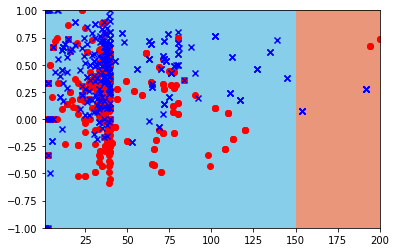

In [29]:
# K petit

# Choix du nombre de plus proche voisin
k = 3

# Création du classifieur KNN et entrainement sur les données test
classique_knn = Classifiers.ClassifierKNN(2, k)
classique_knn.train(X_train, Y_train)

# Affichage des résultats
print("Pour k=", k, "voisins on a :")
print("Accuracy value =", classique_knn.accuracy(X_test, Y_test))
utils.plot_frontiere(X,Y, classique_knn)
utils.plot2DSet(X, Y)

Pour k= 3 voisins on a :
Accuracy value = 0.6122448979591837


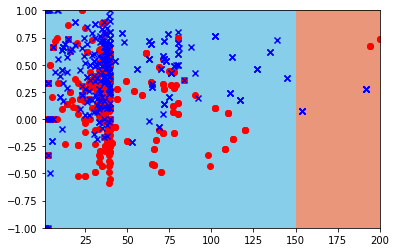

In [34]:
for i in range(10) : classique_knn.train(X_train, Y_train)

# Affichage des résultats
print("Pour k=", k, "voisins on a :")
print("Accuracy value =", classique_knn.accuracy(X_test, Y_test))
utils.plot_frontiere(X,Y, classique_knn)
utils.plot2DSet(X, Y)

Pour k= 10 voisins on a :
Accuracy value = 0.6020408163265306


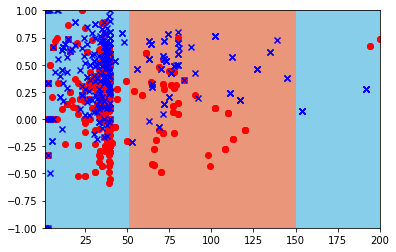

In [31]:
# K élevé

# Choix du nombre de plus proche voisin
k = 10

# Création du classifieur KNN et entrainement sur les données test
classique_knn2 = Classifiers.ClassifierKNN(2, k)
classique_knn2.train(X_train, Y_train)

# Affichage des résultats
print("Pour k=", k, "voisins on a :")
print("Accuracy value =", classique_knn2.accuracy(X_test, Y_test))
utils.plot_frontiere(data_desc_g, data_label_g, classique_knn2)
utils.plot2DSet(data_desc_g, data_label_g)

Pour k= 3 voisins on a :
Accuracy value = 0.6122448979591837


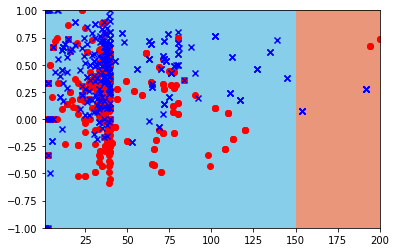

In [36]:
for i in range(100): classique_knn2.train(X_train, Y_train)

# Affichage des résultats
print("Pour k=", k, "voisins on a :")
print("Accuracy value =", classique_knn2.accuracy(X_test, Y_test))
utils.plot_frontiere(data_desc_g, data_label_g, classique_knn2)
utils.plot2DSet(data_desc_g, data_label_g)

Pour k= 3 voisins on a :
Accuracy value = 0.8297872340425532


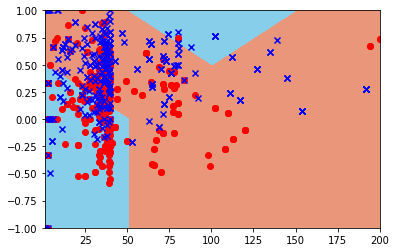

In [32]:
#Entrainement et test sur toutes les données (biaisé)

# Choix du nombre de plus proche voisin
k = 3

# Création du classifieur KNN et entrainement sur les données test
classique_knn2 = Classifiers.ClassifierKNN(2, k)
classique_knn2.train(X, Y)

# Affichage des résultats
print("Pour k=", k, "voisins on a :")
print("Accuracy value =", classique_knn2.accuracy(X, Y))
utils.plot_frontiere(data_desc_g, data_label_g, classique_knn2)
utils.plot2DSet(data_desc_g, data_label_g)

In [106]:
# On vérifie les données

k = 3
niter = 10
perf = []

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = utils.crossval(X, Y, niter, i)
    cl = Classifiers.ClassifierKNN(2,k)
    for j in range(0,10):
        cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])


perf = np.array(perf)
print(f'\nRésultat global de KNN pour k={k:d} :\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.5692307692307692
Apprentissage  2 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.38461538461538464
Apprentissage  3 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.49230769230769234
Apprentissage  4 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.6307692307692307
Apprentissage  5 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.6615384615384615
Apprentissage  6 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.7846153846153846
Apprentissage  7 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.47692307692307695
Apprentissage  8 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.6461538461538462
Apprentissage  9 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.5538461538461539
Apprentissage  10 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.6153846153846154

Résultat global de KNN pour k=3 :	moyenne= 0.582	écart-type= 0.107


In [37]:
# On vérifie les données

k = 10
niter = 10
perf = []

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = utils.crossval(X, Y, niter, i)
    cl = Classifiers.ClassifierKNN(2,k)
    for j in range(0,10):
        cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])


perf = np.array(perf)
print(f'\nRésultat global de KNN pour k={k:d} :\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.6307692307692307
Apprentissage  2 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.49230769230769234
Apprentissage  3 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.3230769230769231
Apprentissage  4 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.5846153846153846
Apprentissage  5 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.5384615384615384
Apprentissage  6 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.6307692307692307
Apprentissage  7 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.46153846153846156
Apprentissage  8 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.6923076923076923
Apprentissage  9 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.5230769230769231
Apprentissage  10 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.676923076923077

Résultat global de KNN pour k=10 :	moyenne= 0.555	écart-type= 0.107


### 2.Perceptron de Rosenblatt

Accuracy du perceptron ( 0.01 ) après 1 train:  0.5
Vecteur de poids trouvé:  [0.55       0.26830988]


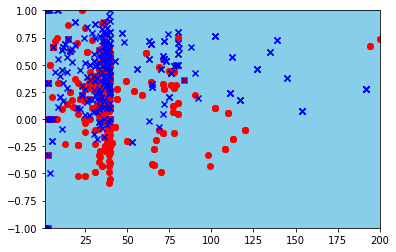

In [90]:
# Choix du learning rate
learning_rate = 0.01

# Création d'un perceptron
perceptronV0 = Classifiers.ClassifierPerceptron(2, learning_rate, history=True)

# Entraînement du classifier:
perceptronV0.train(X_train,Y_train)


# Performance de ce classifieur:
print("Accuracy du perceptron (", learning_rate,") après 1 train: ",perceptronV0.accuracy(X_test,Y_test))
print("Vecteur de poids trouvé: ", perceptronV0.getW())

# Affichage de la frontière de séparation des classes
# On augmente la qualité du tracé en prenant un step élevé:
utils.plot_frontiere(X,Y,perceptronV0,step=150)
utils.plot2DSet(X,Y)

Accuracy du perceptron ( 0.01 ) après les 11 train:  0.5102040816326531
Vecteur de poids trouvé:  [-0.47        1.90290837]


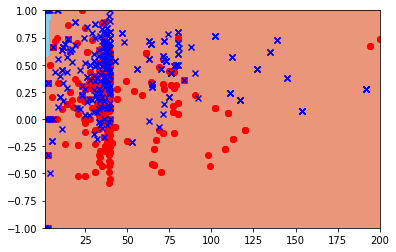

In [91]:
# on rajoute 10 appels de train après le train de la boîte précédente
for i in range(0,10):
    perceptronV0.train(X_train,Y_train)
    
# Performance de ce classifieur:
print("Accuracy du perceptron (", learning_rate,") après les 11 train: ",perceptronV0.accuracy(X_test,Y_test))  
print("Vecteur de poids trouvé: ", perceptronV0.getW())

# Affichage de la frontière de séparation des classes
utils.plot_frontiere(X,Y,perceptronV0,step=150)
utils.plot2DSet(X,Y)

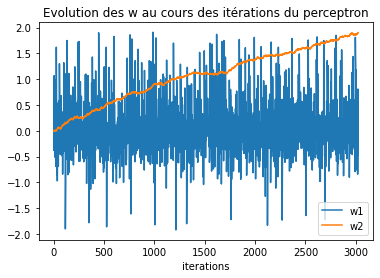

In [92]:
# Affichage de l'évolution du coût

# récupération de l'évolution des w au cours de l'apprentissage 
allw = np.array(perceptronV0.allw) # si allw est sous forme de liste

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])


Accuracy du perceptron ( 0.01 ) après 1 train:  0.4969604863221885
Vecteur de poids trouvé:  [0.35       0.35241161]


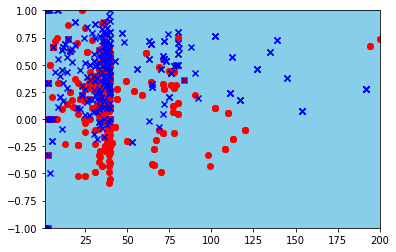

In [93]:
#Entrainement et test sur toutes les données (biaisé)

# Création d'un perceptron
perceptronV0_bis = Classifiers.ClassifierPerceptron(2, learning_rate, history=True)

# Entraînement du classifier:
perceptronV0_bis.train(X,Y)

# Performance de ce classifieur:
print("Accuracy du perceptron (", learning_rate,") après 1 train: ",perceptronV0_bis.accuracy(X,Y))
print("Vecteur de poids trouvé: ", perceptronV0_bis.getW())

# Affichage de la frontière de séparation des classes
# On augmente la qualité du tracé en prenant un step élevé:
utils.plot_frontiere(X,Y,perceptronV0_bis,step=150)
utils.plot2DSet(X,Y)

Accuracy du perceptron ( 0.01 ) après les 11 train:  0.5015197568389058
Vecteur de poids trouvé:  [-1.16       2.3369101]


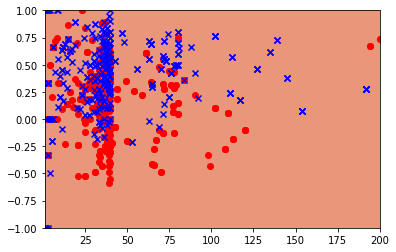

In [94]:
# on rajoute 10 appels de train après le train de la boîte précédente
for i in range(0,10):
    perceptronV0_bis.train(X,Y)
    
# Performance de ce classifieur:
print("Accuracy du perceptron (", learning_rate,") après les 11 train: ",perceptronV0_bis.accuracy(X,Y))  
print("Vecteur de poids trouvé: ", perceptronV0_bis.getW())

# Affichage de la frontière de séparation des classes
utils.plot_frontiere(X,Y,perceptronV0_bis,step=150)
utils.plot2DSet(X,Y)

In [107]:
# Cross-validation
learning_rate = 0.01
niter = 10
perf = []

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = utils.crossval(X, Y, niter, i)
    cl = Classifiers.ClassifierPerceptron(2,learning_rate)
    for j in range(0,10):
        cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])


perf = np.array(perf)
print(f'\nRésultat global du Perceptron:\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.5846153846153846
Apprentissage  2 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.676923076923077
Apprentissage  3 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.4
Apprentissage  4 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.4
Apprentissage  5 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.4461538461538462
Apprentissage  6 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.6307692307692307
Apprentissage  7 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.5846153846153846
Apprentissage  8 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.49230769230769234
Apprentissage  9 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.5538461538461539
Apprentissage  10 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.46153846153846156

Résultat global du Perceptron:	moyenne= 0.523	écart-type= 0.092


### 3. Perceptron de Rosenblatt avec prise en compte du biais

Accuracy du perceptron ( 0.01 ):  0.5
Nombre de mises à jour des poids:  3025


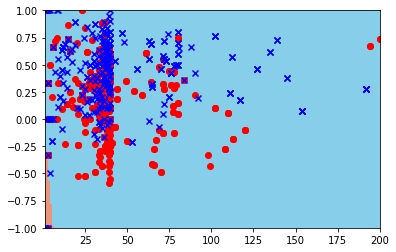

In [95]:
np.random.seed(42)   # on prend 42 comme graine

learning_rate = 0.01

# Création et entraînement du perceptron sur les données générées
perceptronV1 = Classifiers.ClassifierPerceptronBiais(2, learning_rate, history=True)

# on rajoute 10 appels de train après le train de la boîte précédente:
for i in range(0,500):
    perceptronV1.train(X_train,Y_train)

# Performance de ce classifieur:
print("Accuracy du perceptron (", learning_rate,"): ",perceptronV1.accuracy(X_test,Y_test))  
print("Nombre de mises à jour des poids: ",len(allw))
# Affichage de la frontière de séparation des classes
utils.plot_frontiere(X,Y,perceptronV1,step=150)
utils.plot2DSet(X,Y)

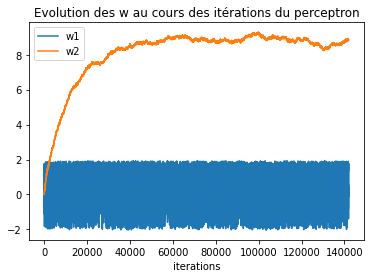

In [96]:
# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
allw = np.array(perceptronV1.allw) # si allw est sous forme de liste

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

Accuracy du perceptron ( 0.01 ):  0.4969604863221885
Nombre de mises à jour des poids:  141926


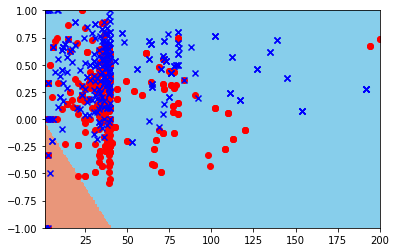

In [97]:
# Entrainement et test sur toutes les données (biaisé)
learning_rate = 0.01

# Création et entraînement du perceptron sur les données générées
perceptronV1_bis = Classifiers.ClassifierPerceptronBiais(2, learning_rate, history=True)

# on rajoute 10 appels de train après le train de la boîte précédente:
for i in range(0,500):
    perceptronV1_bis.train(X,Y)

# Performance de ce classifieur:
print("Accuracy de perceptron (", learning_rate,"): ",perceptronV1_bis.accuracy(X,Y))  
print("Nombre de mises à jour des poids: ",len(allw))
# Affichage de la frontière de séparation des classes
utils.plot_frontiere(X,Y,perceptronV1_bis,step=150)
utils.plot2DSet(X,Y)


In [108]:
# Cross-validation
perf = []
learning_rate = 0.01
niter = 10


for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = utils.crossval(X, Y, niter, i)
    cl = Classifiers.ClassifierPerceptronBiais(2,learning_rate)
    for j in range(0,10):
        cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])


perf = np.array(perf)
print(f'\nRésultat global du Perceptron Biais:\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.4
Apprentissage  2 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.3076923076923077
Apprentissage  3 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.5846153846153846
Apprentissage  4 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.47692307692307695
Apprentissage  5 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.4461538461538462
Apprentissage  6 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.4307692307692308
Apprentissage  7 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.5846153846153846
Apprentissage  8 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.5538461538461539
Apprentissage  9 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.46153846153846156
Apprentissage  10 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.46153846153846156

Résultat global du Perceptron Biais:	moyenne= 0.471	écart-type= 0.082


### 4. ADALINE

Accuracy du perceptron ( 0.01 ) après 1 train:  0.5
Vecteur de poids trouvé:  [0. 0.]


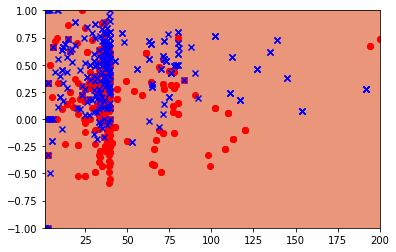

In [98]:
# Choix du learning rate
learning_rate = 0.01

# Création d'un adaline
adalineV0 = Classifiers.ClassifierADALINE(2, learning_rate, history=True)

# Entraînement du classifier:
adalineV0.train(X_train,Y_train)


# Performance de ce classifieur:
print("Accuracy d'Adaline (", learning_rate,") après 1 train: ",adalineV0.accuracy(X_test,Y_test))
print("Vecteur de poids trouvé: ", adalineV0.getW())

# Affichage de la frontière de séparation des classes
# On augmente la qualité du tracé en prenant un step élevé:
utils.plot_frontiere(X,Y,adalineV0,step=150)
utils.plot2DSet(X,Y)

c:\Users\Momo\Documents\L3S6\data science\projet\projet-2021\iads\Classifiers.py:413: RuntimeWarning: invalid value encountered in subtract
  self.w = self.w - (self.learning_rate * grad)
Accuracy du perceptron ( 0.01 ) après les 11 train:  0.5
Vecteur de poids trouvé:  [[nan nan]]


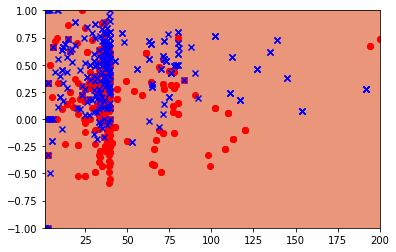

In [99]:
# on rajoute 10 appels de train après le train de la boîte précédente
for i in range(0,10):
    adalineV0.train(X_train,Y_train)
    
# Performance de ce classifieur:
print("Accuracy d'adaline'(", learning_rate,") après les 11 train: ",adalineV0.accuracy(X_test,Y_test))  
print("Vecteur de poids trouvé: ", adalineV0.getW())

# Affichage de la frontière de séparation des classes
utils.plot_frontiere(X,Y,adalineV0,step=150)
utils.plot2DSet(X,Y)

c:\Users\Momo\Documents\L3S6\data science\projet\projet-2021\iads\Classifiers.py:413: RuntimeWarning: invalid value encountered in subtract
  self.w = self.w - (self.learning_rate * grad)
Accuracy d'ADALINE' ( 0.01 ) après 1 train:  0.5
Vecteur de poids trouvé:  [[nan nan]]


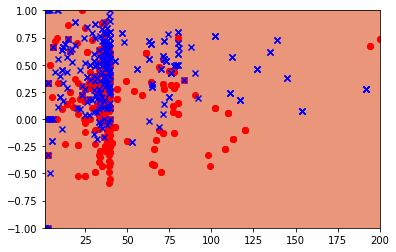

In [101]:
#Entrainement et test sur toutes les données (biaisé)

# Création d'un adaline
adalineV0_bis = Classifiers.ClassifierADALINE(2, learning_rate, history=True)

# Entraînement du classifier:
adalineV0_bis.train(X,Y)

# Performance de ce classifieur:
print("Accuracy d'ADALINE' (", learning_rate,") après 1 train: ",adalineV0_bis.accuracy(X,Y))

# Affichage de la frontière de séparation des classes
# On augmente la qualité du tracé en prenant un step élevé:
utils.plot_frontiere(X,Y,adalineV0_bis,step=150)
utils.plot2DSet(X,Y)

In [110]:
perf = []
niter = 10
learning_rate = 0.01


for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = utils.crossval(X, Y, niter, i)
    cl = Classifiers.ClassifierADALINE(2,learning_rate)
    for j in range(0,10):
        cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])

perf = np.array(perf)
print(f'\nRésultat global de Adaline:\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

c:\Users\Momo\Documents\L3S6\data science\projet\projet-2021\iads\Classifiers.py:413: RuntimeWarning: invalid value encountered in subtract
  self.w = self.w - (self.learning_rate * grad)
Apprentissage  1 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.4
Apprentissage  2 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.676923076923077
Apprentissage  3 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.5846153846153846
Apprentissage  4 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.4
Apprentissage  5 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.4307692307692308
Apprentissage  6 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.38461538461538464
Apprentissage  7 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.5846153846153846
Apprentissage  8 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.5230769230769231
Apprentissage  9 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.46153846153846156
Apprentissage  10 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.5384615384615384

Résultat global de Adaline:	moyenne= 0.498	écart-type= 0.093


#### 5. Essai Adaline Analytique

Accuracy d'Adaline ( 0.01 ) après 1 train:  0.6428571428571429
Vecteur de poids trouvé:  [-0.00211836  0.64930696]


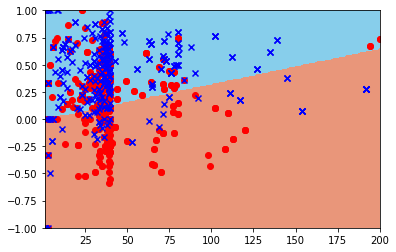

In [104]:
# Création d'un adaline analytique
adalineV1 = Classifiers.ClassifierADALINE2(2)

# Entraînement du classifier:
adalineV1.train(X_train,Y_train)


# Performance de ce classifieur:
print("Accuracy d'Adaline (", learning_rate,") après 1 train: ",adalineV1.accuracy(X_test,Y_test))
print("Vecteur de poids trouvé: ", adalineV1.getW())

# Affichage de la frontière de séparation des classes
# On augmente la qualité du tracé en prenant un step élevé:
utils.plot_frontiere(X,Y,adalineV1,step=150)
utils.plot2DSet(X,Y)

In [111]:
perf = []
niter = 10

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = utils.crossval(X, Y, niter, i)
    cl = Classifiers.ClassifierADALINE2(2)
    for j in range(0,10):
        cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])

perf = np.array(perf)
print(f'\nRésultat global de Adaline2:\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.7076923076923077
Apprentissage  2 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.4307692307692308
Apprentissage  3 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.6461538461538462
Apprentissage  4 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.7384615384615385
Apprentissage  5 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.6461538461538462
Apprentissage  6 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.7538461538461538
Apprentissage  7 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.5692307692307692
Apprentissage  8 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.6153846153846154
Apprentissage  9 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.5230769230769231
Apprentissage  10 :	  |Yapp|=  593  |Ytest|=  65 	perf=  0.6461538461538462

Résultat global de Adaline:	moyenne= 0.628	écart-type= 0.094


## Partie 6 - Analyse

### 1. Résultats par classifier et train

| Classifier | Train |   Accuracy | Commentaire
|----------|:-------------:|:------:| :------:| 
| KNN (k=3)| 1 | 61% | 
| KNN (k=3)| 11 | 61% |
| KNN (k=10)| 1 | 60% |
| KNN (k=10)| 11 | 61% |
| KNN biaisé| 1 | 83% |
| Perceptron| 1 | 50% | (aucune frontière tracée)
| Perceptron| 11 | 50% |(aucune frontière tracée)
| Perceptron biaisé| 1 | 50% |(aucune frontière tracée)
| Perceptron biaisé| 11 | 50% |(aucune frontière tracée)
| Perceptron avec Biais| 1 | 50% |(aucune frontière tracée)
| Perceptron avec Biais| 11 | 50% |(aucune frontière tracée)
| Adaline| 1 | 50% |(aucune frontière tracée)
| Adaline| 11 | 50% |(aucune frontière tracée)
| Adaline biaisé| 1 | 50% |(aucune frontière tracée)
| Adaline Analytique| 1 | 64% |

Remarque : "biaisé" pour les classifiers dont les données d'entraînement == données de test

On peut constater ici que le sur-apprentissage n'est d'aucune utilité, et que les classifiers Perceptron et Adaline (hors analytique) ne sont pas adapté à prendre en compte nos données. 

Le classifiers KNN nous donne une accuracy un peu plus élevé que la moyenne, qu'importe ne nombre de voisins prise en compte. Et enfin Adaline en version Analytique obtient le meilleur résultat après un entraînement. 


### 2. Récapitulatif de la cross-validation (10%/90%)
 
| Classifier | Minimum | Moyenne | Maximum | Ecart-type
|----------|:-------------:|:------:|:------:|:------:| 
| KNN (k=3)| 32% | 55.5%   | 69% | 0.107
| KNN (k=10)| 38% | 58.2% |79%|0.107
| Perceptron| 40% | 52% | 67% | 0.092
| Perceptron biais| 30% | 47% | 58% | 0.082 
| Adaline| 38% | 50% | 60% | 0.093
| Adaline Analytique| 43% | 63% | 75% | 0.094

   Comme constaté précédemment le classifier Adaline Analytique obtient la meilleure moyenne avec un faible écart-type, on peut en conclure qu'il est précis. 
Le meilleure résultat possible est obtenu avec le classifier KNN, en prenant en compte les 10 voisins les plus proches. 

Néanmoins, les plus grosses fluctuations constatée (> 30%) sont aussi constatée sur les classifiers KNN et Adaline Analytique, on ne peut donc pas utiliser ces résultats comme référence. 

### 3. Conclusion

Au vu des résultats obtenus, il nous est impossible d'émettre une conclusion sur la problématique. 

On ne sait donc pas si les consommateurs ont tendance ou non à laisser plus d'avis négatifs que positifs. 
